In [40]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import os

In [55]:
# load data
Sentiment_Result = pd.read_pickle("C:/Users/USER/Desktop/Prof_Hsieh_Project/about_emotion/Chinese_derivative/Sentiment_Analysis/Sentiment_Analysis_Result.pkl")
Sentiment_Result = Sentiment_Result.rename(columns={'Publication_Date': 'Dates'})
TW50 = pd.read_csv("0050_TW.csv")

In [70]:
# 填補股價缺少資料
TW50_prune = TW50.drop(["High", "Low", "Open", "Volume", 'Close'], axis=1)
TW50_dict = {}
for i, j in zip(TW50_prune['Date'], TW50_prune['Adj Close']): 
    date_obj = datetime.datetime.strptime(i, '%Y-%m-%d')
    TW50_dict[date_obj] = j

In [71]:
TW50_dict_filled = TW50_dict.copy()
start_date = datetime.date(2022,10, 29)
end_date = datetime.date(2022,12, 15)

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + datetime.timedelta(n)

for single_date in daterange(start_date, end_date):
    query_date = single_date.strftime("%Y-%m-%d")
    query_date = datetime.datetime.strptime(query_date, '%Y-%m-%d')
    if query_date not in TW50_dict_filled.keys(): # missing value
        i = -1
        before = query_date + datetime.timedelta(-1)
        while before not in TW50_dict_filled.keys(): 
            before += datetime.timedelta(-1)
        i = 1
        after = query_date + datetime.timedelta(1)
        while after not in TW50_dict_filled.keys(): 
            after += datetime.timedelta(1)
        before_val = TW50_dict_filled[before]
        after_val = TW50_dict_filled[after]
        mean_val = (before_val+after_val)/2
        TW50_dict_filled[query_date] = mean_val

In [72]:
dates = list(TW50_dict_filled.keys())
close = list(TW50_dict_filled.values())

TW50_df_pivot = pd.DataFrame()
TW50_df_pivot['Dates'] = dates
TW50_df_pivot['Close'] = close
TW50_df_pivot = TW50_df_pivot.sort_values(by='Dates').reset_index(drop=True)
TW50_df_pivot = TW50_df_pivot.query('"2022-10-28" <= Dates <= "2022-12-15"') # 多一天為了計算delta

In [73]:
print("Sentiment:")
print("start: ", Sentiment_Result.Dates.min(), ", End: ", Sentiment_Result.Dates.max())
print('Size: ', len(Sentiment_Result['Sentiment_Score']), '\n')

print("TW50:")
print("start: ", TW50_df_pivot.Dates.min(), ", End: ", TW50_df_pivot.Dates.max())
print('Size: ', len(TW50_df_pivot['Dates']), )

Sentiment:
start:  2022-10-29 00:00:00 , End:  2022-12-15 00:00:00
Size:  48 

TW50:
start:  2022-10-28 00:00:00 , End:  2022-12-15 00:00:00
Size:  49


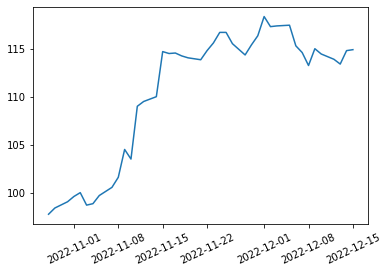

In [74]:
plt.plot(TW50_df_pivot['Dates'], TW50_df_pivot['Close'])
plt.xticks(rotation=25)
plt.show()

In [75]:
TW50_df = TW50_df_pivot.copy()
TW50_df = TW50_df.reset_index(drop=True)
TW50_df['Yesterday'] = TW50_df['Close'].shift(1)
TW50_df['Delta'] = TW50_df['Close'] - TW50_df['Yesterday']
TW50_df = TW50_df.query('"2022-10-29" <= Dates') # 計算完後刪去多的一天
Merge_df = TW50_df.merge(Sentiment_Result, on='Dates')
Merge_df = Merge_df.drop(columns=['Yesterday', 'Tokens', 'token_num'])
Merge_df

,Dates,Close,Delta,Sentiment_Score
0,2022-10-29,98.400002,0.650002,-0.002498
1,2022-10-30,98.725002,0.325001,-0.055003
2,2022-10-31,99.050003,0.325001,-0.039743
3,2022-11-01,99.599998,0.549995,-0.023583
4,2022-11-02,100.000000,0.400002,-0.038870
5,2022-11-03,98.699997,-1.300003,-0.040775
6,2022-11-04,98.849998,0.150001,-0.031491
7,2022-11-05,99.700001,0.850003,-0.026696
8,2022-11-06,100.125002,0.425001,-0.017016
9,2022-11-07,100.550003,0.425001,-0.047300


# Granger Causality

Granger Causality test is used to determine **whether or not one time series is useful for forecasting another.**

This test uses the following null and alternative hypotheses:

> **Null Hypothesis (H0): Time series x does not Granger-cause time series y**

> **Alternative Hypothesis (HA): Time series x Granger-causes time series y**


If the p-value is less than a certain significance level (i.e. α = .05), then we can reject the null hypothesis and conclude that we have sufficient evidence to say that time series x Granger-causes time series y.

In [77]:
# Perform Granger-Causality test on TW50 index directly! (alpha=0.05)
from statsmodels.tsa.stattools import grangercausalitytests

# 1. Test if it have the predictive power on TW50
print("Adjusted Close:")
lag_list1 = []
p_list1 = []
for lag in range(1, 10): 
    res1 = grangercausalitytests(Merge_df[['Close', 'Sentiment_Score']], maxlag=[lag]) 
    lag_list1.append(lag)
    p_list1.append(res1[lag][0]['ssr_ftest'][1]) # parameter: max_lag/0/f test/p_value

Adj_df = pd.DataFrame({'max_lag':lag_list1, 'p_value':p_list1})
Adj_df = Adj_df.sort_values(by='p_value', ascending=True).reset_index(drop=True)
Adj_df

Adjusted Close:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0774  , p=0.3050  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=1.1508  , p=0.2834  , df=1
likelihood ratio test: chi2=1.1370  , p=0.2863  , df=1
parameter F test:         F=1.0774  , p=0.3050  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3425  , p=0.7120  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=0.7684  , p=0.6810  , df=2
likelihood ratio test: chi2=0.7621  , p=0.6831  , df=2
parameter F test:         F=0.3425  , p=0.7120  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8921  , p=0.4540  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=3.1694  , p=0.3662  , df=3
likelihood ratio test: chi2=3.0628  , p=0.3820  , df=3
parameter F test:         F=0.8921  , p=0.4540  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7360  , 

,max_lag,p_value
0,1,0.304954
1,7,0.387881
2,8,0.392657
3,5,0.429811
4,6,0.430226
5,3,0.454027
6,9,0.455777
7,4,0.573732
8,2,0.712032


In [79]:
# Perform Granger-Causality test on TW50 index directly! (alpha=0.05)
from statsmodels.tsa.stattools import grangercausalitytests

# 1. Test if it have the predictive power on TW50
print("Adjusted Close:")
lag_list1 = []
p_list1 = []
for lag in range(1, 10): 
    res1 = grangercausalitytests(Merge_df[['Delta', 'Sentiment_Score']], maxlag=[lag]) 
    lag_list1.append(lag)
    p_list1.append(res1[lag][0]['ssr_ftest'][1]) # parameter: max_lag/0/f test/p_value

Adj_df = pd.DataFrame({'max_lag':lag_list1, 'p_value':p_list1})
Adj_df = Adj_df.sort_values(by='p_value', ascending=True).reset_index(drop=True)
Adj_df

Adjusted Close:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5840  , p=0.4488  , df_denom=44, df_num=1
ssr based chi2 test:   chi2=0.6238  , p=0.4296  , df=1
likelihood ratio test: chi2=0.6197  , p=0.4311  , df=1
parameter F test:         F=0.5840  , p=0.4488  , df_denom=44, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7585  , p=0.4748  , df_denom=41, df_num=2
ssr based chi2 test:   chi2=1.7020  , p=0.4270  , df=2
likelihood ratio test: chi2=1.6713  , p=0.4336  , df=2
parameter F test:         F=0.7585  , p=0.4748  , df_denom=41, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6365  , p=0.5961  , df_denom=38, df_num=3
ssr based chi2 test:   chi2=2.2614  , p=0.5200  , df=3
likelihood ratio test: chi2=2.2064  , p=0.5307  , df=3
parameter F test:         F=0.6365  , p=0.5961  , df_denom=38, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9962  , 

,max_lag,p_value
0,4,0.422615
1,1,0.448818
2,2,0.474827
3,3,0.596111
4,6,0.631783
5,8,0.633911
6,5,0.666624
7,7,0.730443
8,9,0.736332
